In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [528]:
df1 = pd.read_csv("startup.csv")
df2 = pd.read_csv("sanfran_income.csv")
df2.head()

,ID Household Income Bucket,Household Income Bucket,ID Year,Year,Household Income,Household Income Moe,Geography,ID Geography,Slug Geography,share
0,5,"$30,000-$34,999",2018,2018,9175,1592.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.025288
1,15,"$200,000+",2018,2018,103466,4308.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.285166
2,0,"< $10,000",2018,2018,7598669,46912.0,United States,01000US,united-states,0.062530
3,13,"$125,000-$149,999",2018,2018,22912,2172.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.063149
4,1,"$10,000-$14,999",2018,2018,5267344,40230.0,United States,01000US,united-states,0.043345


In [529]:
df2.rename(columns={'Household Income Bucket':'Income', 'Household Income':'Number of People'}, inplace=True)
df2 = df2.filter(['Income', 'Year', 'Number of People', 'Geography'])
df2

,Income,Year,Number of People,Geography
0,"$30,000-$34,999",2018,9175,"San Francisco, CA"
1,"$200,000+",2018,103466,"San Francisco, CA"
2,"< $10,000",2018,7598669,United States
3,"$125,000-$149,999",2018,22912,"San Francisco, CA"
4,"$10,000-$14,999",2018,5267344,United States
...,...,...,...,...
187,"$60,000-$74,999",2013,25923,"San Francisco, CA"
188,"$25,000-$29,999",2013,5905618,United States
189,"$35,000-$39,999",2013,10023,"San Francisco, CA"
190,"$35,000-$39,999",2013,5484000,United States


In [530]:
df3 = df2[df2['Geography'] != 'United States']
df_usa = df2[df2['Geography'] == 'United States']
df3

,Income,Year,Number of People,Geography
0,"$30,000-$34,999",2018,9175,"San Francisco, CA"
1,"$200,000+",2018,103466,"San Francisco, CA"
3,"$125,000-$149,999",2018,22912,"San Francisco, CA"
5,"$100,000-$124,999",2018,28693,"San Francisco, CA"
6,"$75,000-$99,999",2018,32079,"San Francisco, CA"
...,...,...,...,...
184,"$15,000-$19,999",2013,12719,"San Francisco, CA"
186,"$200,000+",2013,58235,"San Francisco, CA"
187,"$60,000-$74,999",2013,25923,"San Francisco, CA"
189,"$35,000-$39,999",2013,10023,"San Francisco, CA"


In [531]:
def categ_name(d):
    d['Income'].replace({'$30,000-$34,999': 'Less than $75,000',
                          '< $10,000': 'Less than $75,000',
                          '$10,000-$14,999': 'Less than $75,000',
                          '$15,000-$19,999': 'Less than $75,000',
                          '$20,000-$24,999': 'Less than $75,000',
                          '$25,000-$29,999': 'Less than $75,000',
                          '$35,000-$39,999': 'Less than $75,000',
                          '$40,000-$44,999': 'Less than $75,000',
                          '$45,000-$49,999': 'Less than $75,000',
                          '$50,000-$59,999': 'Less than $75,000',
                          '$55,000-$59,999': 'Less than $75,000',
                          '$60,000-$74,999': 'Less than $75,000',
                          '$75,000-$99,999': 'Between $75,000 and $150,000',
                          '$100,000-$124,999': 'Between $75,000 and $150,000',
                          '$125,000-$149,999': 'Between $75,000 and $150,000',
                          '$150,000-$199,999': 'Greater than $150,000',
                          '$200,000+': 'Greater than $150,000'
                          },
                          inplace=True)

    return d

categ_name(df3)

c:\python\python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Income,Year,Number of People,Geography
0,"Less than $75,000",2018,9175,"San Francisco, CA"
1,"Greater than $150,000",2018,103466,"San Francisco, CA"
3,"Between $75,000 and $150,000",2018,22912,"San Francisco, CA"
5,"Between $75,000 and $150,000",2018,28693,"San Francisco, CA"
6,"Between $75,000 and $150,000",2018,32079,"San Francisco, CA"
...,...,...,...,...
184,"Less than $75,000",2013,12719,"San Francisco, CA"
186,"Greater than $150,000",2013,58235,"San Francisco, CA"
187,"Less than $75,000",2013,25923,"San Francisco, CA"
189,"Less than $75,000",2013,10023,"San Francisco, CA"


In [532]:
categ_name(df_usa)

c:\python\python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Income,Year,Number of People,Geography
2,"Less than $75,000",2018,7598669,United States
4,"Less than $75,000",2018,5267344,United States
7,"Less than $75,000",2018,5241202,United States
9,"Less than $75,000",2018,5695642,United States
12,"Less than $75,000",2018,5222981,United States
...,...,...,...,...
182,"Less than $75,000",2013,6199796,United States
183,"Greater than $150,000",2013,5842617,United States
185,"Less than $75,000",2013,5506746,United States
188,"Less than $75,000",2013,5905618,United States


In [806]:
df3['Number of People'] = df3['Number of People'].apply(lambda x: int(x))

categ = pd.DataFrame()
for i in range(6):
    if categ.empty:
        categ = df3[df3['Year'] == df3['Year'].unique()[i]].groupby('Income').agg({'Number of People': np.sum}).reset_index()
        categ['Year'] = df3['Year'].unique()[i]
    else:
        tmp = df3[df3['Year'] == df3['Year'].unique()[i]].groupby('Income').agg({'Number of People': np.sum}).reset_index()
        tmp['Year'] = df3['Year'].unique()[i]
        categ = pd.concat([tmp, categ])
#categ.set_index('Year', inplace=True)
categ['City'] = df3['Geography'][0]
categ = categ.groupby('Year').apply(pd.DataFrame.sort_values, 'Number of People')
categ.reset_index(drop=True, inplace=True)
categ.set_index('Year', inplace=True)
categ

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Income,Number of People,City
Year,,,
2013,"Greater than $150,000",89851,"San Francisco, CA"
2013,"Between $75,000 and $150,000",92955,"San Francisco, CA"
2013,"Less than $75,000",171845,"San Francisco, CA"
2014,"Greater than $150,000",90536,"San Francisco, CA"
2014,"Between $75,000 and $150,000",102076,"San Francisco, CA"
2014,"Less than $75,000",160794,"San Francisco, CA"
2015,"Between $75,000 and $150,000",93557,"San Francisco, CA"
2015,"Greater than $150,000",111058,"San Francisco, CA"
2015,"Less than $75,000",152301,"San Francisco, CA"


In [807]:
df_usa['Number of People'] = df_usa['Number of People'].apply(lambda x: int(x))

categ1 = pd.DataFrame()
for i in range(6):
    if categ1.empty:
        categ1 = df_usa[df_usa['Year'] == df_usa['Year'].unique()[i]].groupby('Income').agg({'Number of People': np.sum}).reset_index()
        categ1['Year'] = df_usa['Year'].unique()[i]
    else:
        tmp = df_usa[df_usa['Year'] == df_usa['Year'].unique()[i]].groupby('Income').agg({'Number of People': np.sum}).reset_index()
        tmp['Year'] = df_usa['Year'].unique()[i]
        categ1 = pd.concat([tmp, categ1])
categ1.set_index('Year', inplace=True)
categ1['City'] = 'United States'
categ1

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Income,Number of People,City
Year,,,
2013,"Between $75,000 and $150,000",28573695,United States
2013,"Greater than $150,000",11486838,United States
2013,"Less than $75,000",76230500,United States
2014,"Between $75,000 and $150,000",29431649,United States
2014,"Greater than $150,000",12307240,United States
2014,"Less than $75,000",75520538,United States
2015,"Between $75,000 and $150,000",30502331,United States
2015,"Greater than $150,000",13337580,United States
2015,"Less than $75,000",74368339,United States


In [853]:
df4 = pd.read_csv("sanfran_proptax.csv")
df4

,ID Real Estate Taxes Paid,Real Estate Taxes Paid,ID Year,Year,Real Estate Taxes by Mortgage,Real Estate Taxes by Mortgage Moe,Geography,ID Geography,Slug Geography,share
0,1,"$800 to $1,499",2018,2018,8332,1220.172119,"San Francisco, CA",16000US0667000,san-francisco-ca,0.061156
1,5,No Real Estate Taxes Paid,2018,2018,1326,506.411888,"San Francisco, CA",16000US0667000,san-francisco-ca,0.009733
2,0,Less Than $800,2018,2018,10920375,55918.756969,United States,01000US,united-states,0.140530
3,3,"$2,000 to $2,999",2018,2018,8477,1296.834608,"San Francisco, CA",16000US0667000,san-francisco-ca,0.062220
4,1,"$800 to $1,499",2018,2018,12785402,66415.014462,United States,01000US,united-states,0.164531
...,...,...,...,...,...,...,...,...,...,...
67,2,"$1,500 to $1,999",2013,2013,7341688,41048.786974,United States,01000US,united-states,0.099422
68,2,"$1,500 to $1,999",2013,2013,4910,948.008439,"San Francisco, CA",16000US0667000,san-francisco-ca,0.038597
69,4,"$3,000 or More",2013,2013,24886195,72858.254742,United States,01000US,united-states,0.337011
70,1,"$800 to $1,499",2013,2013,13671,1557.206794,"San Francisco, CA",16000US0667000,san-francisco-ca,0.107467


In [854]:
df4.rename(columns={'Real Estate Taxes Paid':'Property Tax', 'Real Estate Taxes by Mortgage':'Number of People'}, inplace=True)
df4 = df4.filter(['Property Tax', 'Year', 'Number of People', 'Geography'])
df4

,Property Tax,Year,Number of People,Geography
0,"$800 to $1,499",2018,8332,"San Francisco, CA"
1,No Real Estate Taxes Paid,2018,1326,"San Francisco, CA"
2,Less Than $800,2018,10920375,United States
3,"$2,000 to $2,999",2018,8477,"San Francisco, CA"
4,"$800 to $1,499",2018,12785402,United States
...,...,...,...,...
67,"$1,500 to $1,999",2013,7341688,United States
68,"$1,500 to $1,999",2013,4910,"San Francisco, CA"
69,"$3,000 or More",2013,24886195,United States
70,"$800 to $1,499",2013,13671,"San Francisco, CA"


In [865]:
df5 = df4[df4['Geography'] != 'United States']
df_usa2 = df4[df4['Geography'] == 'United States']
df5['Property Tax'].unique()

array(['$800 to $1,499', 'No Real Estate Taxes Paid', '$2,000 to $2,999',
       '$1,500 to $1,999', '$3,000 or More', 'Less Than $800'],
      dtype=object)

In [866]:
def categ_sect2(d):
    d['Property Tax'].replace({'$800 to $1,499': 'Less than $1500',
                                 'No Real Estate Taxes Paid': 'Less than $1500',
                                 '$2,000 to $2,999': 'Between $1500 and $3000',
                                 '$1,500 to $1,999': 'Between $1500 and $3000',
                                 '$3,000 or More': 'Greater than $3000',
                                 'Less Than $800': 'Less than $1500'
                              },
                              inplace=True)

    return d
categ_sect2(df5)
categ_sect2(df_usa2)

c:\python\python37\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Property Tax,Year,Number of People,Geography
2,Less than $1500,2018,10920375,United States
4,Less than $1500,2018,12785402,United States
7,Between $1500 and $3000,2018,7420205,United States
9,Between $1500 and $3000,2018,11882220,United States
10,Less than $1500,2018,3235342,United States
11,Greater than $3000,2018,31464850,United States
12,Less than $1500,2017,11233460,United States
13,Between $1500 and $3000,2017,7428430,United States
16,Less than $1500,2017,13053304,United States
18,Between $1500 and $3000,2017,11879515,United States


In [867]:
df5['Number of People'] = df5['Number of People'].apply(lambda x: int(x))

categ2 = pd.DataFrame()
for i in range(6):
    if categ2.empty:
        categ2 = df5[df5['Year'] == df5['Year'].unique()[i]].groupby('Property Tax').agg({'Number of People': np.sum}).reset_index()
        categ2['Year'] = df3['Year'].unique()[i]
    else:
        tmp = df5[df5['Year'] == df5['Year'].unique()[i]].groupby('Property Tax').agg({'Number of People': np.sum}).reset_index()
        tmp['Year'] = df5['Year'].unique()[i]
        categ2 = pd.concat([tmp, categ2])
#categ.set_index('Year', inplace=True)
categ2['City'] = df5['Geography'][0]
categ2 = categ2.groupby('Year').apply(pd.DataFrame.sort_values, 'Number of People')
categ2.reset_index(drop=True, inplace=True)
categ2.set_index('Year', inplace=True)
categ2[categ2['Property Tax'] == 'Greater than $3000']['Number of People']

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Year
2013     86927
2014     94968
2015     96172
2016    103005
2017    100671
2018    111014
Name: Number of People, dtype: int64

In [868]:
df5['Number of People'] = df5['Number of People'].apply(lambda x: int(x))

categ3 = pd.DataFrame()
for i in range(6):
    if categ3.empty:
        categ3 = df_usa2[df_usa2['Year'] == df_usa2['Year'].unique()[i]].groupby('Property Tax').agg({'Number of People': np.sum}).reset_index()
        categ3['Year'] = df_usa2['Year'].unique()[i]
    else:
        tmp = df_usa2[df_usa2['Year'] == df_usa2['Year'].unique()[i]].groupby('Property Tax').agg({'Number of People': np.sum}).reset_index()
        tmp['Year'] = df_usa2['Year'].unique()[i]
        categ3 = pd.concat([tmp, categ3])
#categ.set_index('Year', inplace=True)
categ3['City'] = df4['Geography'][2]
categ3 = categ3.groupby('Year').apply(pd.DataFrame.sort_values, 'Number of People')
categ3.reset_index(drop=True, inplace=True)
categ3.set_index('Year', inplace=True)
categ3

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Property Tax,Number of People,City
Year,,,
2013,Between $1500 and $3000,18750970,United States
2013,Greater than $3000,24886195,United States
2013,Less than $1500,30206696,United States
2014,Between $1500 and $3000,18634844,United States
2014,Greater than $3000,25513711,United States
2014,Less than $1500,29843440,United States
2015,Between $1500 and $3000,19075540,United States
2015,Greater than $3000,27144833,United States
2015,Less than $1500,28286139,United States


In [805]:
df_startup = pd.read_csv("startup.csv")
end = df3['Geography'][0].index(',')
df_startup = df_startup[df_startup['City'] == df3['Geography'][0][0:end]]
df_startup

,City,Year,Number of Startups
0,San Francisco,2013,770
1,San Francisco,2014,951
2,San Francisco,2015,984
3,San Francisco,2016,930
4,San Francisco,2017,849
5,San Francisco,2018,664


In [848]:
categ2[categ2['Property Tax'] == 'Greater Than $2000']['Number of People']

Series([], Name: Number of People, dtype: int64)

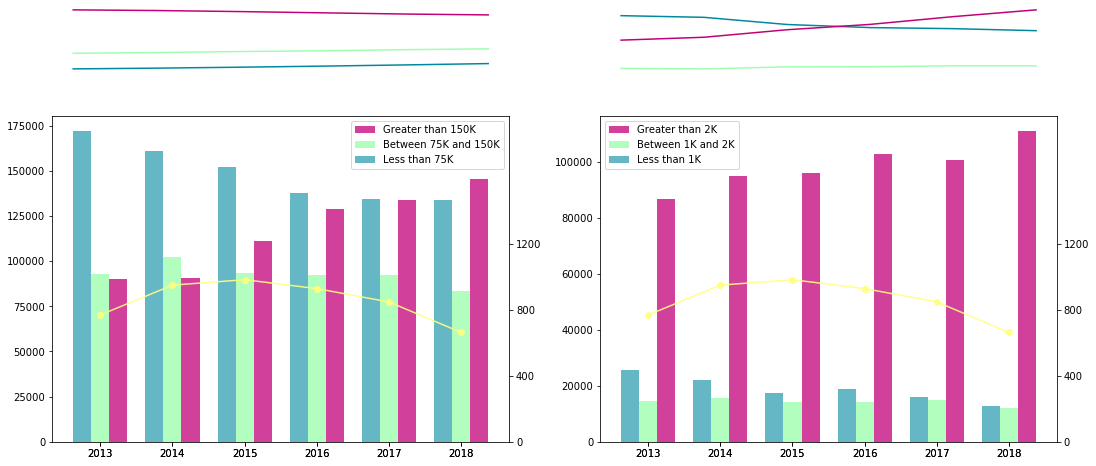

In [877]:
import mplcursors
import matplotlib.gridspec as gridspec

fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(8)
gspec = gridspec.GridSpec(200, 2)

bottom1 = plt.subplot(gspec[50:, 0:1])
top1 = plt.subplot(gspec[0:30,0:1])
bottom2 = plt.subplot(gspec[50:, 1:])
top2 = plt.subplot(gspec[0:30,1:])


poor = categ[categ['Income'] == 'Less than $75,000']['Number of People']
middle = categ[categ['Income'] == 'Between $75,000 and $150,000']['Number of People']
upper = categ[categ['Income'] == 'Greater than $150,000']['Number of People']

low = categ2[categ2['Property Tax'] == 'Less than $1500']['Number of People']
medium = categ2[categ2['Property Tax'] == 'Between $1500 and $3000']['Number of People']
high = categ2[categ2['Property Tax'] == 'Greater than $3000']['Number of People']

# Left
y1 = poor
y2 = middle
y3 = upper
x = categ[categ['Income'] == 'Less than $75,000'].index

y4 = categ1[categ1['Income'] == 'Less than $75,000']['Number of People']
y5 = categ1[categ1['Income'] == 'Between $75,000 and $150,000']['Number of People']
y6 = categ1[categ1['Income'] == 'Greater than $150,000']['Number of People'] 

bottom1.bar(x+0.25, y3, width=0.25, color=sns.xkcd_rgb["magenta"], alpha=0.75, align='center', picker=5, label='Greater than 150K')
bottom1.bar(x, y2, width=0.25, color=sns.xkcd_rgb["mint"], alpha=0.8, align='center', picker=5, label='Between 75K and 150K')
bottom1.bar(x-0.25, y1, width=0.25, color=sns.xkcd_rgb["teal blue"], alpha=0.6, align='center', picker=5, label='Less than 75K')
bottom1.legend()

start = fig.add_subplot(2,2,3, sharex=bottom, frameon=False)
start.plot(x, df_startup['Number of Startups'], '-o', color=sns.xkcd_rgb["banana"], alpha=0.9)
start.yaxis.tick_right()
start.yaxis.set_ticks(range(0, 1600, 400))

top1.plot(x, y6, color=sns.xkcd_rgb["teal blue"])
top1.plot(x, y5, color=sns.xkcd_rgb["mint"])
top1.plot(x, y4, color=sns.xkcd_rgb["magenta"])
top1.set_xticks([], [])
top1.set_yticks([], [])
top1.spines['top'].set_visible(False)
top1.spines['bottom'].set_visible(False)
top1.spines['right'].set_visible(False)
top1.spines['left'].set_visible(False)

#Right
y7 = low
y8 = medium
y9 = high

y10 = categ3[categ3['Property Tax'] == 'Less than $1500']['Number of People']
y11 = categ3[categ3['Property Tax'] == 'Between $1500 and $3000']['Number of People']
y12 = categ3[categ3['Property Tax'] == 'Greater than $3000']['Number of People'] 

bottom2.bar(x+0.25, y9, width=0.25, color=sns.xkcd_rgb["magenta"], alpha=0.75, align='center', picker=5, label='Greater than 2K')
bottom2.bar(x, y8, width=0.25, color=sns.xkcd_rgb["mint"], alpha=0.8, align='center', picker=5, label='Between 1K and 2K')
bottom2.bar(x-0.25, y7, width=0.25, color=sns.xkcd_rgb["teal blue"], alpha=0.6, align='center', picker=5, label='Less than 1K')
bottom2.legend()

start1 = fig.add_subplot(2,2,4, sharex=bottom2, frameon=False)
start1.plot(x, df_startup['Number of Startups'], '-o', color=sns.xkcd_rgb["banana"], alpha=0.9)
start1.yaxis.tick_right()
start1.yaxis.set_ticks(range(0, 1600, 400))

top2.plot(x, y10, color=sns.xkcd_rgb["teal blue"])
top2.plot(x, y11, color=sns.xkcd_rgb["mint"])
top2.plot(x, y12, color=sns.xkcd_rgb["magenta"])
top2.set_xticks([], [])
top2.set_yticks([], [])
top2.spines['top'].set_visible(False)
top2.spines['bottom'].set_visible(False)
top2.spines['right'].set_visible(False)
top2.spines['left'].set_visible(False)